In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path

import numpy as np
import torch
import torch as tr
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision as tv
from torchvision.transforms import v2
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

%matplotlib inline

In [25]:
from impl.arch import ConvNetwork

In [4]:
import impl.retinal_dataset as rd

transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Resize((224, 224)),
])

train_dataset = rd.RetinalDataset(transform=transform, split="train", num_rows=-1)
test_dataset = rd.RetinalDataset(transform=transform, split="test", num_rows=-1)

100%|█████████████████████████████| 640/640 [02:36<00:00,  4.10it/s]


In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=64)

In [26]:
model = ConvNetwork()

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.5)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
model.train()
for i in range(4):
    epoch_loss = 0
    # b = 0

    for images, labels in train_dataloader:
        model.train()

        optimizer.zero_grad()
        logits = model(images)
        loss = loss_fn(logits, labels)
        # if b % 4 == 0:
        #     print(f"{b+1}: {loss/len(images)}")

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        # b += 1

    print(f"==== Epoch {i+1}: train_loss={epoch_loss/len(train_dataset):.10f}")

print("Done")

In [ ]:
# torch.save({'model_state': model.state_dict()},'checkpoints/model1_004.chk')

In [33]:
# checkpoint = torch.load('checkpoints/model1_003.chk')
# model.load_state_dict(checkpoint['model_state'])

In [57]:
@torch.no_grad()
def calculate_loss(dataset):
    model.eval()

    dataloader = DataLoader(dataset,
                            batch_size=min(128, len(dataset)))

    total_loss = 0
    for images, labels in dataloader:
        logits = model(images)
        loss = loss_fn(logits, labels)
        total_loss += loss.item()

    total_loss /= len(dataset)
    return total_loss

In [58]:
train_loss = calculate_loss(train_dataset)
print(f"{train_loss=}")

test_loss = calculate_loss(test_dataset)
print(f"{test_loss=}")

train_loss=0.0051520498469471935
test_loss=0.005152546614408493


Text(0.5, 1.0, 'y=1, pred=1')

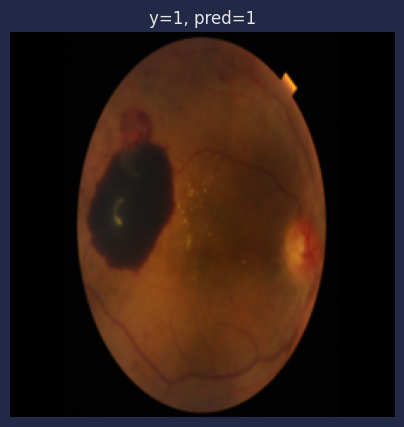

In [54]:
model.eval()

plt.figure(figsize=(5,5))

index = 123
image, label = test_dataset[index]
logits = model(image)
pred_label = logits.argmax(dim=0).item()

plt.imshow(image.movedim(0,-1).clamp(min=0.0, max=1.0))
plt.axis('off')
plt.title(f"y={label}, pred={pred_label}")

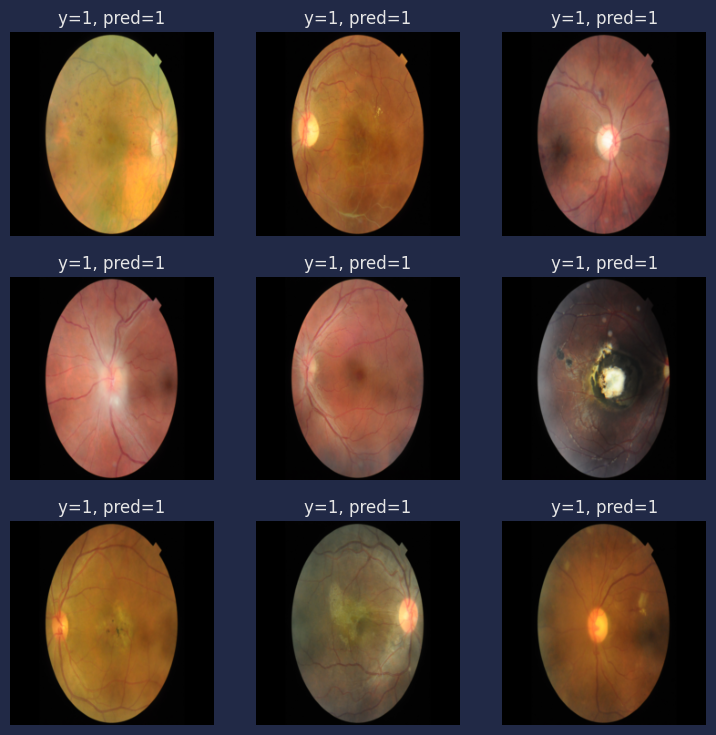

In [55]:
model.eval()

num_images = 9
_, axs = plt.subplots(num_images // 3, 3,
    figsize=(9, 3 * num_images // 3))

axs = axs.flatten().tolist()

for i, ax in enumerate(axs):
    image, label = test_dataset[i]
    logits = model(image)
    pred_label = logits.argmax(dim=0).item()

    disp = image.clamp(min=0.0, max=1.0).movedim(0,-1)
    ax.imshow(disp)
    ax.set_title(f"y={label}, pred={pred_label}")
    ax.set_axis_off()